# Introdução com Keras

### Bibliotecas básicas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

### Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

### Exploração dos dados

In [3]:
print(f'Shape treino: {imagens_treino.shape}')
print(f'Shape teste: {imagens_teste.shape}')

Shape treino: (60000, 28, 28)
Shape teste: (10000, 28, 28)


### Exibição dos dados

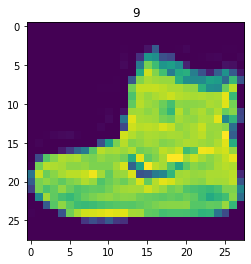

In [4]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])
plt.show()

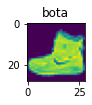

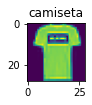

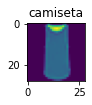

In [5]:
total_labels = 10
nome_classificacoes = ['camiseta', 'calça', 'pullover', 'vestido', 'casaco', 'sandália', 'camisa', 'tênis', 'bolsa', 'bota']


for imagem in range(3):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nome_classificacoes[identificacoes_treino[imagem]])
  plt.show()  

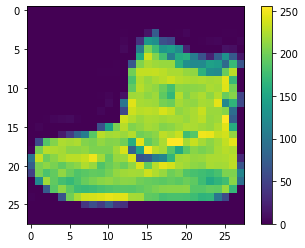

In [6]:
plt.imshow(imagens_treino[0])
plt.colorbar()
plt.show()

### Criando o modelo


     modelo sequencia
                        entrada
                        processamento
                        saída

In [7]:
imagens_treino_normalizado = imagens_treino/255.0

In [8]:
modelo = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28, 28)),
                           keras.layers.Dense(256, activation=tensorflow.nn.relu),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(total_labels, activation=tensorflow.nn.softmax)
                           ])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
historico = modelo.fit(imagens_treino_normalizado, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6733 - accuracy: 0.7640 - val_loss: 0.4197 - val_accuracy: 0.8418
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4159 - accuracy: 0.8486 - val_loss: 0.3826 - val_accuracy: 0.8562
Epoch 3/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3660 - accuracy: 0.8695 - val_loss: 0.3485 - val_accuracy: 0.8737
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3432 - accuracy: 0.8752 - val_loss: 0.3747 - val_accuracy: 0.8649
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3216 - accuracy: 0.8818 - val_loss: 0.3279 - val_accuracy: 0.8808


### Avaliando o modelo

In [9]:
testes = modelo.predict(imagens_teste)
print(f'Predito: {np.argmax(testes[0])}')
print(f'Real: {identificacoes_teste[0]}')

Predito: 9
Real: 9


In [10]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print(f'Perda: {perda_teste} | Acurácia: {acuracia_teste}')

313/313 [==============================] - 1s 2ms/step - loss: 51.1348 - accuracy: 0.8722
Perda: 51.13479232788086 | Acurácia: 0.8722000122070312


### Validação

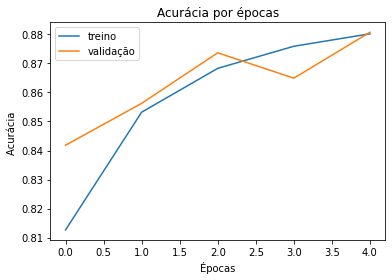

In [11]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia ')
plt.legend(['treino', 'validação'])
plt.show()

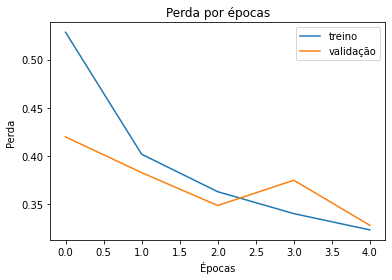

In [12]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda ')
plt.legend(['treino', 'validação'])
plt.show()

### Salvando e carregando o modelo

In [13]:
modelo.save('modelo.h5')

In [15]:
from tensorflow.keras.models import load_model
modelo_salvo = load_model('modelo.h5')